In [1]:
import requests
import json 
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo 
import os

url = "https://www.stackoverflow.com"
response = requests.get(url)

In [12]:
response

<Response [200]>

In [13]:
response.status_code

200

In [2]:
print(response.text)


<!DOCTYPE html>


    <html class="html__responsive " lang="en">

    <head>

        <title>Stack Overflow - Where Developers Learn, Share, &amp; Build Careers</title>
        <link rel="shortcut icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196">
        <link rel="apple-touch-icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a">
        <link rel="image_src" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a"> 
        <link rel="search" type="application/opensearchdescription+xml" title="Stack Overflow" href="/opensearch.xml">
        <meta name="description" content="Stack Overflow is the largest, most trusted online community for developers to learn, share&#x200B; &#x200B;their programming &#x200B;knowledge, and build their careers."/>
    <meta name="viewport" content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0">
        <me

In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="html__responsive" lang="en">
 <head>
  <title>
   Stack Overflow - Where Developers Learn, Share, &amp; Build Careers
  </title>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196" rel="shortcut icon"/>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="apple-touch-icon"/>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="image_src"/>
  <link href="/opensearch.xml" rel="search" title="Stack Overflow" type="application/opensearchdescription+xml"/>
  <meta content="Stack Overflow is the largest, most trusted online community for developers to learn, share​ ​their programming ​knowledge, and build their careers." name="description"/>
  <meta content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>
  <meta content="noarchive" name="bingbot"/>
  <meta content="website" p

In [4]:
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame

# No keys required for crypto data
client = CryptoHistoricalDataClient()

# Creating request object
request_params = CryptoBarsRequest(
  symbol_or_symbols=["BTC/USD"],
  timeframe=TimeFrame.Day,
  start="2022-09-01",
  end="2024-08-05")

request_params

NameError: name 'CryptoHistoricalDataClient' is not defined

In [10]:
# Retrieve daily bars for Bitcoin in a DataFrame and printing it
btc_bars = client.get_crypto_bars(request_params)

# Convert to dataframe
df = btc_bars.df
# Reset the index to drop the current index
df.reset_index(inplace=True)

# Set the timestamp column back as the index
df.set_index('timestamp', inplace=True)
df

NameError: name 'client' is not defined

In [5]:
def plot_data(df, title):
    plt.style.use('seaborn-v0_8')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    df['close'].plot()
    plt.show()

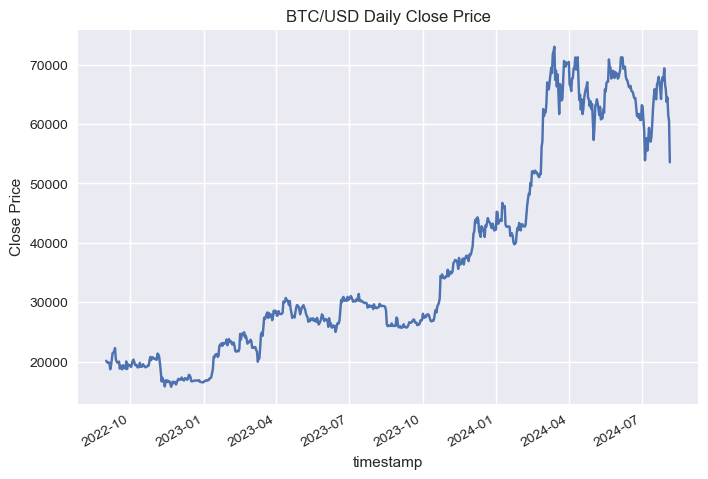

In [15]:
plot_data(df, title='BTC/USD Daily Close Price')

In [ ]:
for key, value in os.environ.items():
    if key.startswith('APCA'):
        print(f"{key}={value}") 

In [9]:
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from alpaca.data.historical import StockHistoricalDataClient
import os 
from matplotlib import pyplot as plt
from datetime import datetime 

# Create today's date
today = datetime.now().strftime("%Y-%m-%d")

# Set up Alpaca API keys
api_key_id = os.getenv('APCA_API_KEY')
api_secret_key = os.getenv('APCA_API_SECRET_KEY')

# Create a client for stock historical data
client = StockHistoricalDataClient(api_key=api_key_id, 
                                   secret_key=api_secret_key)

# Creating request object for stock data
request_params = StockBarsRequest(
  symbol_or_symbols=["AAPL"],
  timeframe=TimeFrame.Day,
  start="1980-09-01",
  adjustment='split',
  end=today
)

# Fetch the data
response = client.get_stock_bars(request_params)

# Print the response
print(response)

data={'AAPL': [{   'close': 26.34,
    'high': 26.34,
    'low': 25.5,
    'open': 25.65,
    'symbol': 'AAPL',
    'timestamp': datetime.datetime(2016, 1, 4, 5, 0, tzinfo=TzInfo(UTC)),
    'trade_count': 351452.0,
    'volume': 287741356.0,
    'vwap': 26.02}, {   'close': 25.68,
    'high': 26.46,
    'low': 25.6,
    'open': 26.44,
    'symbol': 'AAPL',
    'timestamp': datetime.datetime(2016, 1, 5, 5, 0, tzinfo=TzInfo(UTC)),
    'trade_count': 321365.0,
    'volume': 234762144.0,
    'vwap': 25.85}, {   'close': 25.18,
    'high': 25.59,
    'low': 24.97,
    'open': 25.14,
    'symbol': 'AAPL',
    'timestamp': datetime.datetime(2016, 1, 6, 5, 0, tzinfo=TzInfo(UTC)),
    'trade_count': 409164.0,
    'volume': 284319308.0,
    'vwap': 25.21}, {   'close': 24.11,
    'high': 25.03,
    'low': 24.11,
    'open': 24.67,
    'symbol': 'AAPL',
    'timestamp': datetime.datetime(2016, 1, 7, 5, 0, tzinfo=TzInfo(UTC)),
    'trade_count': 462836.0,
    'volume': 343985812.0,
    'vwap': 24.

In [10]:
df_apple = response.df
df_apple.reset_index(inplace=True)
df_apple.set_index('timestamp', inplace=True)
df_apple.tail()

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2024-08-12 04:00:00+00:00,AAPL,216.07,219.5099,215.6000,217.53,38028092.0,602530.0,217.546527
2024-08-13 04:00:00+00:00,AAPL,219.01,221.8900,219.0100,221.27,44155331.0,553265.0,220.875752
2024-08-14 04:00:00+00:00,AAPL,220.57,223.0300,219.7000,221.72,41960574.0,568519.0,221.510785
2024-08-15 04:00:00+00:00,AAPL,224.60,225.3500,222.7600,224.72,46414013.0,590575.0,224.550284
2024-08-16 04:00:00+00:00,AAPL,223.92,226.8271,223.6501,226.05,44340240.0,562638.0,225.430556


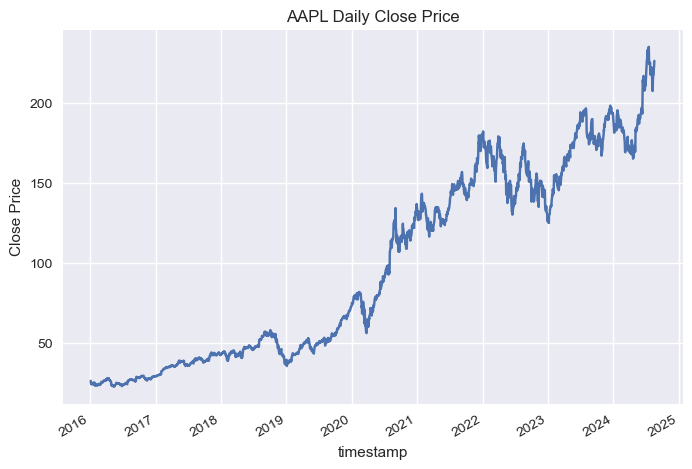

In [11]:
plot_data(df=df_apple, title='AAPL Daily Close Price')

In [12]:
data = [go.Scatter(x=df_apple.index, 
                   y=df_apple['close'],
                   mode='lines',
                   marker=dict(color='steelblue'))]
layout = go.Layout(title='APPLE Daily Close Price',
                   title_x=0.5,
                   xaxis_title='Date',
                   yaxis_title='Close Price',
                   hovermode='closest')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [13]:
import plotly.graph_objs as go
import pandas as pd

# Sample DataFrame (assuming df_apple is already defined and contains the necessary data)
# For demonstration purposes, let's create a sample DataFrame
data = {
    'date': pd.date_range(start='2022-09-01', end='2023-09-01', freq='B'),
    'close': pd.Series(range(100, 100 + len(pd.date_range(start='2022-09-01', end='2023-09-01', freq='B'))))
}
# df_apple = pd.DataFrame(data)
# df_apple.set_index('close', inplace=True)

# Define significant events
annotations = [
    dict(
        x='2022-09-07',  # Example date
        y=df_apple.loc['2022-09-07', 'close'],
        xref='x',
        yref='y',
        text='Event 1: New iPhone Release',
        showarrow=True,
        arrowhead=2,
        ax=-50,
        ay=-50
    ),
    dict(
        x='2023-01-27',  # Example date
        y=df_apple.loc['2023-01-27', 'close'],
        xref='x',
        yref='y',
        text='Event 2: Quarterly Earnings',
        showarrow=True,
        arrowhead=2,
        ax=-50,
        ay=-50
    )
]

data = [go.Scatter(x=df_apple.index, 
                   y=df_apple['close'],
                   mode='lines',
                   marker=dict(color='steelblue'))]

layout = go.Layout(
    title=dict(
        text='APPLE Daily Close Price',
        x=0.5,
        font=dict(size=24)  # Make the title larger
    ),
    xaxis_title='Date',
    yaxis_title='Close Price',
    hovermode='closest',
    annotations=annotations  # Add annotations to the layout
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [14]:
df_apple

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2016-01-04 05:00:00+00:00,AAPL,25.65,26.3400,25.5000,26.34,287741356.0,351452.0,26.020000
2016-01-05 05:00:00+00:00,AAPL,26.44,26.4600,25.6000,25.68,234762144.0,321365.0,25.850000
2016-01-06 05:00:00+00:00,AAPL,25.14,25.5900,24.9700,25.18,284319308.0,409164.0,25.210000
2016-01-07 05:00:00+00:00,AAPL,24.67,25.0300,24.1100,24.11,343985812.0,462836.0,24.500000
2016-01-08 05:00:00+00:00,AAPL,24.64,24.7800,24.1900,24.24,300265168.0,419555.0,24.470000
...,...,...,...,...,...,...,...,...
2024-08-12 04:00:00+00:00,AAPL,216.07,219.5099,215.6000,217.53,38028092.0,602530.0,217.546527
2024-08-13 04:00:00+00:00,AAPL,219.01,221.8900,219.0100,221.27,44155331.0,553265.0,220.875752
2024-08-14 04:00:00+00:00,AAPL,220.57,223.0300,219.7000,221.72,41960574.0,568519.0,221.510785


--- 

# Economic Calendar

---

## 1. Get Economic Events from Alpha Vantage

In [19]:
from FedTools import MonetaryPolicyCommittee

# Create an instance of the MonetaryPolicyCommittee class
monetary_policy = MonetaryPolicyCommittee()

# Get the FOMC meeting statements
dataset = monetary_policy.find_statements()

# Display the dataset
print(dataset)

Constructing links between 1994 and 2024
Extracting the past 199 FOMC Statements.
Retrieving articles.
.......................................................................................................................................................................................................                                              FOMC_Statements
1994-02-04  Chairman Alan Greenspan announced today that t...
1994-03-22  Chairman Alan Greenspan announced today that t...
1994-04-18  Chairman Alan Greenspan announced today that t...
1994-05-17  The Federal Reserve today announced two action...
1994-08-16  The Federal Reserve Board today approved an in...
...                                                       ...
2024-01-31  The Federal Reserve, the central bank of the U...
2024-03-20  The Federal Reserve, the central bank of the U...
2024-05-01  The Federal Reserve, the central bank of the U...
2024-06-12  The Federal Reserve, the central bank of the U...
2024-07-31  The 

In [29]:
df = pd.DataFrame(dataset)
df['Date'] = pd.to_datetime(df.index)
df.head()
df.head().to_csv('fomc_statements.csv', index=False)

In [34]:
import pyfedwatch as fw
from pyfedwatch.datareader import read_price_history, get_fedfunds_range
from pyfedwatch.datareader import read_fomc_data, get_fomc_data

## FedWatch 
sources: 
* https://www.cmegroup.com/education/videos/introduction-to-cme-fedwatch.html 
* https://github.com/ARahimiQuant/pyfedwatch/blob/master/notebooks/00-pyfedwatch-user-guide.ipynb 

In [36]:
# Get FOMC meetings data
fomc_data_2 = get_fomc_data()
fomc_dates_2 = fomc_data_2[(fomc_data_2['Status'] == 'Scheduled') | (fomc_data_2['Status'] == 'Cancelled')].index.tolist()

In [42]:
# Fed meetings
fomc_dates_2[356:-16]

['2024-01-31',
 '2024-03-20',
 '2024-05-01',
 '2024-06-12',
 '2024-07-31',
 '2024-09-18',
 '2024-11-07',
 '2024-12-18']

In [43]:
# Get Fed Funds target rate upper and lower limits
ff_range = get_fedfunds_range()
ff_range

/Users/oliverdreger/opt/anaconda3/envs/ml2024v2/lib/python3.10/site-packages/pyfedwatch/datareader.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ff_range['DFEDTARL'].fillna(ff_range['DFEDTAR'], inplace=True)
/Users/oliverdreger/opt/anaconda3/envs/ml2024v2/lib/python3.10/site-packages/pyfedwatch/datareader.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becau

,LL,UL
Date,,
1982-09-27,10.25,10.25
1982-09-28,10.25,10.25
1982-09-29,10.25,10.25
1982-09-30,10.25,10.25
1982-10-01,10.00,10.00
...,...,...
2024-08-18,5.25,5.50
2024-08-19,5.25,5.50
2024-08-20,5.25,5.50


In [48]:
# Testing FOMC class
fomc = fw.fomc.FOMC(watch_date = '2023-03-10',
                    fomc_dates = fomc_dates_2,
                    num_upcoming = 16)

fomc.summary

,Contract,Meeting,Order
YYYY-MM,,,
2023-01,ZQF23,No FOMC,0
2023-02,ZQG23,2023-02-01,-1
2023-03,ZQH23,2023-03-22,1
2023-04,ZQJ23,No FOMC,0
2023-05,ZQK23,2023-05-03,2
2023-06,ZQM23,2023-06-14,3
2023-07,ZQN23,2023-07-26,4
2023-08,ZQQ23,No FOMC,0
2023-09,ZQU23,2023-09-20,5


In [50]:
dash.__version__

'2.17.1'

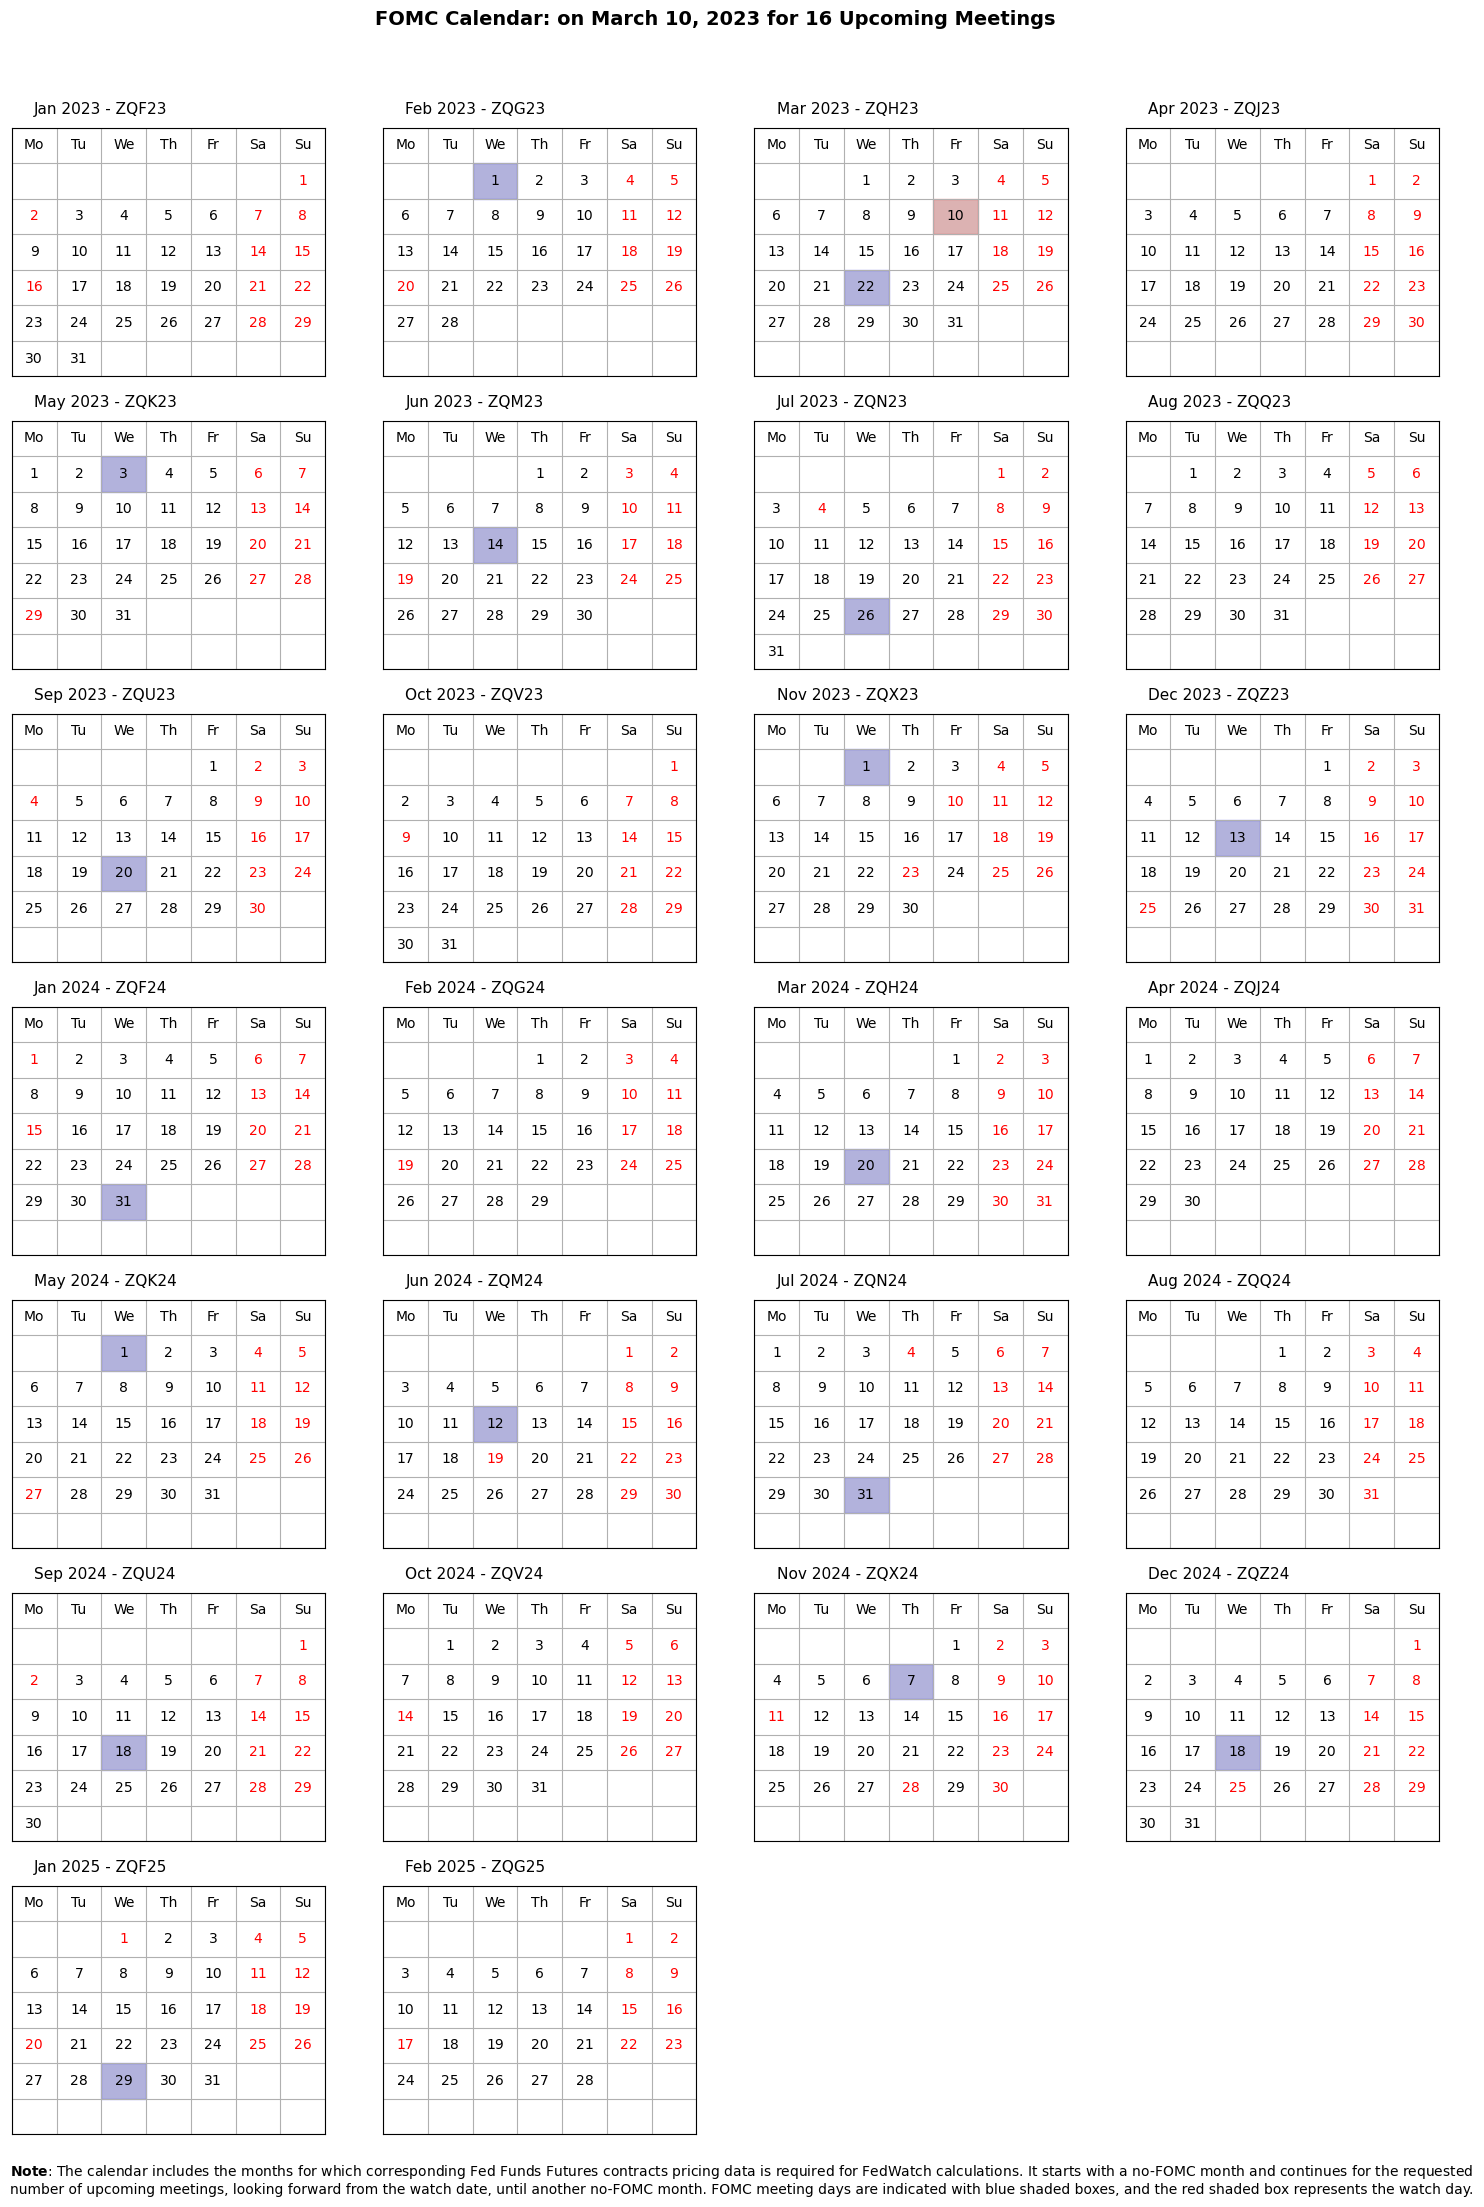

In [49]:
# Plot FOMC calendar
fig = fomc.plot_fomc_calendar()

In [32]:
from openbb import obb
import pandas as pd 
import datetime
import os 
from matplotlib import pyplot as plt

pd.options.display.max_columns = None
biz_token_api_key = os.getenv('X_RAPID_API_KEY')
open_bb_api_key = os.getenv('OPEN_BB_API_KEY')
openbb.account.login(pat=open_bb_api_key)
openbb.account.save()

# Get the price of a stock
quote_data = obb.equity.price.quote(symbol="AAPL", provider="yfinance")
quote_data.to_dataframe()

,symbol,asset_type,name,exchange,bid,bid_size,ask,ask_size,last_price,open,high,low,volume,prev_close,year_high,year_low,ma_50d,ma_200d,volume_average,volume_average_10d,currency
0,AAPL,EQUITY,Apple Inc.,NMS,224.5,500,229.59,100,224.53,227.6,228.34,223.9,43434198,226.4,237.23,164.08,219.8598,192.75784,64811409.0,40651800.0,USD


In [23]:
openbb.account.login(pat=open_bb_api_key)
openbb.account.save()
obb.equity.price.historical(symbol="AAPL", provider="yfinance").to_df()

,open,high,low,close,volume,split_ratio,dividend
date,,,,,,,
2023-08-23,178.520004,181.550003,178.330002,181.119995,52722800,0.0,0.0
2023-08-24,180.669998,181.100006,176.009995,176.380005,54945800,0.0,0.0
2023-08-25,177.380005,179.149994,175.820007,178.610001,51449600,0.0,0.0
2023-08-28,180.089996,180.589996,178.550003,180.190002,43820700,0.0,0.0
2023-08-29,179.699997,184.899994,179.500000,184.119995,53003900,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-16,223.919998,226.830002,223.649994,226.050003,44340200,0.0,0.0
2024-08-19,225.720001,225.990005,223.039993,225.889999,40687800,0.0,0.0
2024-08-20,225.770004,227.169998,225.449997,226.509995,30299000,0.0,0.0


In [22]:
obb.equity.price.performance(symbol="AAPL").to_dataframe()

/Users/oliverdreger/opt/anaconda3/envs/ml2024v3/lib/python3.10/site-packages/finvizfinance/screener/base.py:131: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame(frame)], ignore_index=True)


,symbol,one_day,one_week,one_month,three_month,six_month,ytd,one_year,volatility_week,volatility_month,price,volume,average_volume,relative_volume,analyst_score
0,AAPL,-0.0083,-0.0008,0.0274,0.1762,0.2178,0.1662,0.2669,0.0136,0.0243,224.53,43695320.0,64590000.0,0.66,1.89


In [26]:
all_companies = obb.equity.search("", provider="sec")
all_companies.to_dataframe()

,symbol,name,cik
0,AAPL,Apple Inc.,320193
1,MSFT,MICROSOFT CORP,789019
2,NVDA,NVIDIA CORP,1045810
3,GOOGL,Alphabet Inc.,1652044
4,AMZN,AMAZON COM INC,1018724
...,...,...,...
10160,OCSAW,Oculis Holding AG,1953530
10161,AITRU,AI Transportation Acquisition Corp,1966734
10162,AITRR,AI Transportation Acquisition Corp,1966734
10163,BAYAR,Bayview Acquisition Corp,1969475


In [27]:
obb.regulators.sec.institutions_search("Berkshire Hathaway").to_df()

,name,cik
0,BERKSHIRE HATHAWAY ENERGY CO,0001081316
1,BERKSHIRE HATHAWAY FINANCE CORP,0001274791
2,BERKSHIRE HATHAWAY HOMESTATE INSURANCE CO.,0000829771
3,BERKSHIRE HATHAWAY INC /DE/,0000109694
4,BERKSHIRE HATHAWAY INC/DE,0000109694
5,BERKSHIRE HATHAWAY INC,0001067983
6,BERKSHIRE HATHAWAY LIFE INSURANCE CO OF NEBRASKA,0001015867
7,LMZ & BERKSHIRE HATHAWAY CO,0001652795


In [28]:
df_daily = obb.equity.price.historical(symbol = "spy", provider="yfinance")
df_daily.to_df().head(1)

,open,high,low,close,volume,split_ratio,dividend,capital_gains
date,,,,,,,,
2023-08-23,439.25,443.670013,439.100006,443.029999,68441000,0.0,0.0,0.0


In [48]:
df_daily =(
  obb.equity.price.historical(symbol = "MTB", start_date = "1990-01-01", provider="yfinance")
  .to_df()
)
display(df_daily.head(1))
display(df_daily.tail(1))

,open,high,low,close,volume,split_ratio,dividend
date,,,,,,,
1990-03-05,6.4,6.4,6.4,6.4,0,0.0,0.0


,open,high,low,close,volume,split_ratio,dividend
date,,,,,,,
2024-08-23,165.839996,170.880005,165.470001,168.679993,891000,0.0,0.0


In [46]:
company = obb.equity.search("MTB", provider="sec").to_dataframe()
company

,symbol,name,cik
0,MTB,M&T BANK CORP,36270
1,AMTB,Amerant Bancorp Inc.,1734342
2,MTBLY,"Moatable, Inc.",1509223
3,MTB-PJ,M&T BANK CORP,36270
4,MTB-PH,M&T BANK CORP,36270


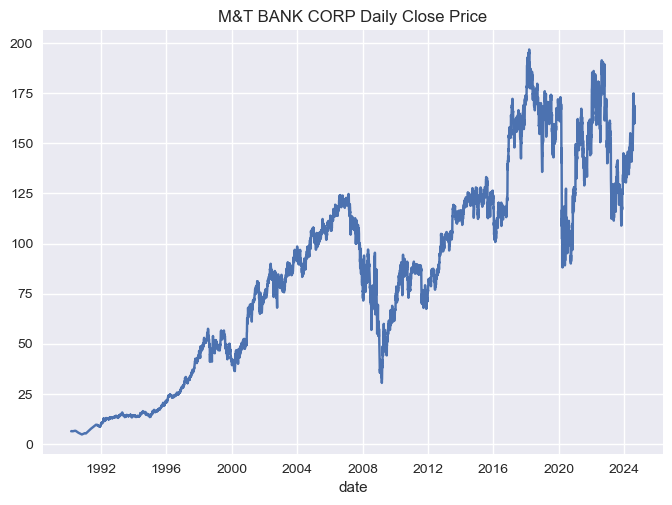

In [47]:
plt.style.use('seaborn-v0_8')
df_daily['close'].plot(title=f'{company["name"].values[0]} Daily Close Price');

In [1]:
import requests
import pandas as pd

def get_economic_events(api_key, start_date, end_date):
    url = f"https://www.alphavantage.co/query"
    params = {
        "function": "ECONOMIC_EVENTS",
        "apikey": api_key,
        "start_date": start_date,
        "end_date": end_date
    }
    response = requests.get(url, params=params)
    data = response.json()

    events = []
    for event in data['economic_event_data']:
        events.append({
            "date": event['timestamp'],
            "event_name": event['event_name'],
            "actual": event.get('actual'),
            "forecast": event.get('forecast'),
            "previous": event.get('previous')
        })
    
    return pd.DataFrame(events)

In [2]:
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
import os 


# Function to get economic events
def get_economic_events(api_key, start_date, end_date):
    url = f"https://www.alphavantage.co/query"
    params = {
        "function": "ECONOMIC_EVENTS",
        "apikey": api_key,
        "start_date": start_date,
        "end_date": end_date
    }
    response = requests.get(url, params=params)
    data = response.json()

    events = []
    for event in data['economic_event_data']:
        events.append({
            "date": event['timestamp'],
            "event_name": event['event_name'],
            "actual": event.get('actual'),
            "forecast": event.get('forecast'),
            "previous": event.get('previous')
        })
    
    return pd.DataFrame(events)

# Set your Alpha Vantage API key
api_key = os.getenv('ALPHAVANTAGE_API_KEY')

# Fetch economic events data
df_events = get_economic_events(api_key, "2024-01-01", "2024-12-31")

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout of the app
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Economic Events Dashboard"), width=12)
    ]),
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='event-dropdown',
                options=[{'label': event, 'value': event} for event in df_events['event_name'].unique()],
                multi=True,
                placeholder="Select Economic Events"
            )
        ], width=12)
    ]),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='events-plot')
        ], width=12)
    ])
])

# Define callback to update the graph based on the selected events
@app.callback(
    Output('events-plot', 'figure'),
    [Input('event-dropdown', 'value')]
)
def update_graph(selected_events):
    if selected_events:
        filtered_df = df_events[df_events['event_name'].isin(selected_events)]
    else:
        filtered_df = df_events
    
    fig = px.scatter(
        filtered_df,
        x="date",
        y="actual",
        color="event_name",
        hover_data=["forecast", "previous"],
        title="Economic Events Over Time"
    )
    
    return fig

app.run_server(debug=True)

KeyError: 'economic_event_data'

In [3]:
import requests
import pandas as pd

def get_economic_events(api_key, start_date, end_date):
    url = f"https://www.alphavantage.co/query"
    params = {
        "function": "ECONOMIC_EVENTS",
        "apikey": api_key,
        "start_date": start_date,
        "end_date": end_date
    }
    response = requests.get(url, params=params)
    
    # Print the response content for debugging
    print(response.json())
    
    # Check if the response contains the expected data
    data = response.json()
    if 'economic_event_data' not in data:
        raise ValueError("The API response does not contain 'economic_event_data'. Please check the API key, request limits, or response format.")
    
    events = []
    for event in data['economic_event_data']:
        events.append({
            "date": event['timestamp'],
            "event_name": event['event_name'],
            "actual": event.get('actual'),
            "forecast": event.get('forecast'),
            "previous": event.get('previous')
        })
    
    return pd.DataFrame(events)

In [4]:
def get_economic_events(api_key, start_date, end_date):
    url = f"https://www.alphavantage.co/query"
    params = {
        "function": "ECONOMIC_EVENTS",
        "apikey": api_key,
        "start_date": start_date,
        "end_date": end_date
    }
    response = requests.get(url, params=params)
    data = response.json()

    if 'economic_event_data' not in data:
        print("Error: API response does not contain 'economic_event_data'. Full response:")
        print(data)
        return pd.DataFrame()  # Return an empty DataFrame if the data is not found

    events = []
    for event in data['economic_event_data']:
        events.append({
            "date": event['timestamp'],
            "event_name": event['event_name'],
            "actual": event.get('actual'),
            "forecast": event.get('forecast'),
            "previous": event.get('previous')
        })
    
    return pd.DataFrame(events)